# Week 2

To start off Week 2 we will review Week 1 and see where to continue with Week 2.

This includes both selling and buying stocks.

My analysis is broken down as:

1. Week 1 Review
2. Week 2 S&P 500
3. Week 2 yfinance
4. Analyze Price Difference and Change
5. Week 1 Stocks
6. Week 2 Stocks

## Week 1 Review

Lets begin by reviewing our week 1 data.

Recall it was saved as `output.csv`.

In [1]:
import pandas as pd

# look at week 1 data again
df = pd.read_csv('output.csv')

# Remove overvalued stocks
df.drop(df[df['Difference'] > 0].index, inplace = True)
df.head(20)

,Symbol,Historical Average,Current Price,Difference,Change
8,JPM,167.819584,163.05,-4.769584,-1.95
10,JNJ,163.422081,162.40,-1.022081,0.45
11,UNH,451.858751,449.47,-2.388751,-9.53
13,V,215.680224,203.33,-12.350224,-2.19
14,BAC,47.130837,46.32,-0.810837,-0.91
16,MA,351.610416,348.22,-3.390416,-8.12
20,DIS,165.920001,155.58,-10.340001,-1.55
21,XOM,63.612224,63.61,-0.002224,-2.88
23,CMCSA,53.215417,52.78,-0.435417,-0.91
25,PYPL,226.086043,200.50,-25.586043,-6.50


In [2]:
# Get week 1 symbols
week1_symbols = df['Symbol']
week1_symbols.head(20)
print(len(week1_symbols))

231


## Week 2 S&P 500

Now lets get updated S&P 500 data.

We will do the same thing as week 1.

In order to cut down on analysis time, we will ignore over valued stocks since we are not interested in over paying for stocks.

This helps us cut down on half the time since we only analyze 231 stocks out of ~500.

In [3]:
import requests

# Make a connection to slickcharts S&P 500 page
url = 'https://www.slickcharts.com/sp500'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36'}
request = requests.get(url, headers=headers)

# Get the table of information
html = request.content
df_list = pd.read_html(html)
week2_df = df_list[0]
print(week2_df)

       #                    Company Symbol    Weight    Price    Chg     % Chg
0      1      Microsoft Corporation   MSFT  6.426956   337.70  -2.13  (-0.63%)
1      2                 Apple Inc.   AAPL  6.363584   161.30   0.28   (0.17%)
2      3            Amazon.com Inc.   AMZN  3.915833  3580.00   7.43   (0.21%)
3      4                  Tesla Inc   TSLA  2.362437  1101.00 -55.87  (-4.83%)
4      5      Alphabet Inc. Class A  GOOGL  2.217068  2915.62 -10.42  (-0.36%)
..   ...                        ...    ...       ...      ...    ...       ...
501  502  Under Armour Inc. Class A    UAA  0.012157    24.80  -0.56  (-2.21%)
502  503  Under Armour Inc. Class C     UA  0.010694    21.20  -0.30  (-1.40%)
503  504     Discovery Inc. Class A  DISCA  0.010559    25.50  -0.21  (-0.82%)
504  505   News Corporation Class B    NWS  0.007055    22.64  -0.03  (-0.13%)
505  506     Orion Office REIT Inc.    ONL  0.000074    18.79   0.30   (1.62%)

[506 rows x 7 columns]


In [4]:
# Remove stocks that we are not tracking
week2_df.drop(week2_df[~week2_df['Symbol'].isin(week1_symbols)].index, inplace = True)
week2_df.head(20)

,#,Company,Symbol,Weight,Price,Chg,% Chg
9,10,JPMorgan Chase & Co.,JPM,1.236011,168.28,3.93,(2.39%)
11,12,Johnson & Johnson,JNJ,1.058084,160.69,0.99,(0.62%)
12,13,UnitedHealth Group Incorporated,UNH,1.038364,447.13,9.59,(2.19%)
14,15,Bank of America Corp,BAC,0.862533,47.50,1.22,(2.64%)
15,16,Visa Inc. Class A,V,0.830718,198.49,2.91,(1.49%)
20,21,Walt Disney Company,DIS,0.705026,151.03,-3.13,(-2.03%)
21,22,Mastercard Incorporated Class A,MA,0.704468,329.00,7.70,(2.40%)
22,23,Exxon Mobil Corporation,XOM,0.655392,63.13,1.62,(2.63%)
25,26,Comcast Corporation Class A,CMCSA,0.593794,51.80,0.29,(0.56%)
27,28,Cisco Systems Inc.,CSCO,0.579108,55.39,0.79,(1.45%)


In [5]:
df[['Symbol', 'Week 1 Diff', 'Week 1 Ch']] = df[['Symbol', 'Difference', 'Change']]
df = df.drop(columns=['Historical Average', 'Current Price', 'Difference', 'Change'])
df.head(20)

,Symbol,Week 1 Diff,Week 1 Ch
8,JPM,-4.769584,-1.95
10,JNJ,-1.022081,0.45
11,UNH,-2.388751,-9.53
13,V,-12.350224,-2.19
14,BAC,-0.810837,-0.91
16,MA,-3.390416,-8.12
20,DIS,-10.340001,-1.55
21,XOM,-0.002224,-2.88
23,CMCSA,-0.435417,-0.91
25,PYPL,-25.586043,-6.50


## Week 2 yfinance

Now we can get week 2 data from Yahoo Finance using yfinance.

We will collect data that tracks the stock price difference from its average value and its change.

In [6]:
from collections import Counter
from statistics import mean
import yfinance as yf
import sys

collect_data = input('Perform data collection? (Yes): ')

if collect_data == 'Yes':

    differences = []
    changes = []
    i = 1
    print('Beginning data collection')
    for symbol in week1_symbols:

        if i % 50 == 0:
            print(i, 'Stocks Assessed')

        # Get 1 week of data
        ticker = yf.Ticker(symbol)
        history = ticker.history(interval='1wk')
        averages = []

        # Find average price
        for row in history.itertuples():
            average = (row.High + row.Low + row.Open + row.Close) / 4
            if pd.isnull(average) == False:
                averages.append(average)

            if len(averages) == 0:
                continue

        historical = mean(averages)

        try:
            current = ticker.info['regularMarketPrice']
        except KeyError:
            continue

        difference = current - historical
        differences.append(difference)

        # Check how stock is growing
        change = week2_df.loc[week2_df['Symbol'] == symbol, 'Chg'].item()
        changes.append(change)
        i += 1

    print('Finished data collection')

    # Add the new data to our data frame
    df['Week 2 Diff'] = differences
    df['Week 2 Ch'] = changes
    
    df.to_csv('week2.csv', index=False)

else:
    
    print('Data collection skipped')

Perform data collection? (Yes): Yes
Beginning data collection
50 Stocks Assessed
100 Stocks Assessed
150 Stocks Assessed
200 Stocks Assessed
Finished data collection


In [7]:
df = pd.read_csv('week2.csv')
df.head(20)

,Symbol,Week 1 Diff,Week 1 Ch,Week 2 Diff,Week 2 Ch
0,JPM,-4.769584,-1.95,-4.509375,3.93
1,JNJ,-1.022081,0.45,-1.041562,0.99
2,UNH,-2.388751,-9.53,-3.739169,9.59
3,V,-12.350224,-2.19,-10.533245,2.91
4,BAC,-0.810837,-0.91,0.352917,1.22
5,MA,-3.390416,-8.12,-13.385001,7.70
6,DIS,-10.340001,-1.55,-11.199167,-3.13
7,XOM,-0.002224,-2.88,0.023836,1.62
8,CMCSA,-0.435417,-0.91,-0.544375,0.29
9,PYPL,-25.586043,-6.50,-11.467709,-1.08


## Analyze Price Difference and Change

Lets see how the stocks have performed over the last 2 weeks.

We will look at the change in price difference versus the change in price change.

In [8]:
# Now calculate any change in price difference
df['1 to 2 Diff'] = df['Week 2 Diff'] - df['Week 1 Diff']

In [9]:
# Calculate any change in price change
df['1 to 2 Ch'] = df['Week 2 Ch'] - df['Week 1 Ch']

In [10]:
df.head(20)

,Symbol,Week 1 Diff,Week 1 Ch,Week 2 Diff,Week 2 Ch,1 to 2 Diff,1 to 2 Ch
0,JPM,-4.769584,-1.95,-4.509375,3.93,0.260209,5.88
1,JNJ,-1.022081,0.45,-1.041562,0.99,-0.019481,0.54
2,UNH,-2.388751,-9.53,-3.739169,9.59,-1.350418,19.12
3,V,-12.350224,-2.19,-10.533245,2.91,1.816979,5.10
4,BAC,-0.810837,-0.91,0.352917,1.22,1.163754,2.13
5,MA,-3.390416,-8.12,-13.385001,7.70,-9.994584,15.82
6,DIS,-10.340001,-1.55,-11.199167,-3.13,-0.859166,-1.58
7,XOM,-0.002224,-2.88,0.023836,1.62,0.026060,4.50
8,CMCSA,-0.435417,-0.91,-0.544375,0.29,-0.108958,1.20
9,PYPL,-25.586043,-6.50,-11.467709,-1.08,14.118334,5.42


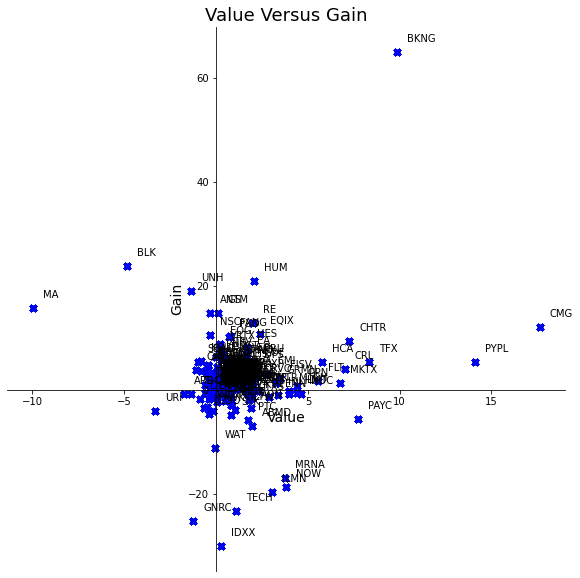

In [11]:
import matplotlib.pyplot as plt

# Make a scatter plot
x = df['1 to 2 Diff'].values
y = df['1 to 2 Ch'].values
sym = df.reset_index()['Symbol'].values

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x, y)

ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Gain', fontsize=14)
ax.set_title('Value Versus Gain', fontsize=18)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

for i, text in enumerate(sym):
    ax.annotate(text, (x[i], y[i]), xytext=(10, 10), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='blue')

plt.savefig('week2.png', bbox_inches='tight')

This graph shows that a lot of stocks gained value over the past 2 weeks.

They also have improved gains which could be promising.

## Week 1 Stocks

Lets check how the 5 stocks we bought are performing.

In [13]:
week1_stocks = ['GNRC', 'IDXX', 'ILMN', 'MRNA', 'SYK']
week1_only = df.copy()
week1_only.drop(week1_only[~week1_only['Symbol'].isin(week1_stocks)].index, inplace = True)
week1_only.head()

,Symbol,Week 1 Diff,Week 1 Ch,Week 2 Diff,Week 2 Ch,1 to 2 Diff,1 to 2 Ch
38,MRNA,-28.105000,11.17,-24.329750,-5.69,3.775250,-16.86
39,SYK,-7.797295,-0.94,-6.980502,-5.76,0.816794,-4.82
63,ILMN,-21.792088,3.42,-18.733001,-16.15,3.059087,-19.57
64,IDXX,-6.113958,13.27,-5.830002,-16.68,0.283956,-29.95
122,GNRC,-33.700831,17.89,-34.952998,-7.16,-1.252166,-25.05


While the stocks that we bought are still undervalued, their gains have begun to go down.

So they did show growth but now we are losing value.

We will sell all 5 stocks and look for better options.

## Week 2 Stocks

We will try again to find undervalued stocks that are gaining value.

In [20]:
by_change = df.copy()
by_change = by_change.sort_values(by='1 to 2 Ch', ascending=False)
with pd.option_context('display.max_rows', None):
    print(by_change)

    Symbol  Week 1 Diff  Week 1 Ch  Week 2 Diff  Week 2 Ch  1 to 2 Diff  \
36    BKNG   -75.875204     -35.99   -66.012993      29.09     9.862211   
24     BLK   -14.888541      -7.82   -19.742997      16.10    -4.854456   
61     HUM    -5.210417     -16.22    -3.171000       4.84     2.039417   
2      UNH    -2.388751      -9.53    -3.739169       9.59    -1.350418   
5       MA    -3.390416      -8.12   -13.385001       7.70    -9.994584   
34    ANTM    -1.622501     -10.67    -1.952500       4.26    -0.329999   
23      GS   -14.509173      -4.62   -14.424000      10.18     0.085173   
202     RE    -0.061250      -7.29     1.971002       5.62     2.032253   
68     CMG   -27.724374     -25.17   -10.091499     -12.95    17.632875   
48    EQIX    -8.104168      -7.19    -5.704501       3.71     2.399667   
51     NSC    -5.806451      -7.95    -6.136065       2.67    -0.329615   
157   FANG    -2.031667      -5.94    -1.289000       4.59     0.742667   
83     PXD    -6.271335  

`BKNG` shows that it is still very undervalued, is gaining value, and is also making big gains. I will take a risk on it.

`BLK` is interesting in that it is losing value, but it is very undervalued, and is also making big gains. Another risk, we will see if it pays off.

`HUM` is a modest stock. Slowly gaining value while still being undervalued. It is also making good gains.

`UNH` is in a simlilar postition.

We will also take a risk on `MA`.

`ANTM`, `GS`, and `RE` all seem to be constantly undervalued but now they are making gains. Lets try to capitalize on them.

We will be investing in 8 different stocks.